In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [23]:
# import all from /raw_data/
# TODO concat all files in /raw_data/ into one dataframe
all_acc_csvs = glob.glob(os.getcwd() + "/raw_data/accelerometer/*.csv")
all_gyro_csvs = glob.glob(os.getcwd() + "/raw_data/gyroscope/*.csv")

sensor_df = pd.DataFrame()
for acc_file, gyro_file in zip(all_acc_csvs, all_gyro_csvs):
    acc_df = pd.read_csv(acc_file).loc[:, ["Timestamp", "x", "y", "z", "payload"]] \
        .rename(columns={"x": "acc_x", "y": "acc_y", "z": "acc_z"})

    gyro_df = pd.read_csv(gyro_file).loc[:, ["Timestamp", "x", "y", "z", "payload"]] \
        .rename(columns={"x": "gyro_x", "y": "gyro_y", "z": "gyro_z"})

    combined_df = pd.merge(acc_df, gyro_df, on="payload")

    print(acc_df.shape, gyro_df.shape, combined_df.shape)
    #combined_df = pd.merge_asof(acc_df, gyro_df, on="Timestamp", direction="nearest")


    print(combined_df.head())
    payloads_equal = np.array_equal(combined_df.loc[:, "payload_x"].values, combined_df.loc[:, "payload_y"].values)
    assert payloads_equal, "payloads not equal, df's merged wrong"

    sensor_df = pd.concat([sensor_df, combined_df], axis=0)

print(combined_df.head())

# df_acc = pd.concat([pd.read_csv(filename, index_col=None, header=0) 
#             for filename in all_acc_csvs], axis=0, ignore_index=True)

# df_gyro = pd.concat([pd.read_csv(filename, index_col=None, header=0) 
#             for filename in all_gyro_csvs], axis=0, ignore_index=True)

(1866, 5) (1326, 5) (108268, 9)
     Timestamp_x     acc_x     acc_y     acc_z payload    Timestamp_y  \
0  1635536411201  0.021559 -0.129356  9.820264     NaN  1635536363928   
1  1635536411201  0.021559 -0.129356  9.820264     NaN  1635536363950   
2  1635536411201  0.021559 -0.129356  9.820264     NaN  1635536363976   
3  1635536411201  0.021559 -0.129356  9.820264     NaN  1635536364000   
4  1635536411201  0.021559 -0.129356  9.820264     NaN  1635536364023   

     gyro_x    gyro_y    gyro_z  
0  0.002131 -0.000799  0.000266  
1  0.000000 -0.000799  0.000266  
2 -0.001065  0.002397 -0.001864  
3  0.001065 -0.000799  0.002397  
4  0.003196  0.001332 -0.001864  


KeyError: 'payload_x'

In [21]:
# Cut off the readings when one sensor is started before the other
print(df_acc.shape, df_gyro.shape)

if df_acc.shape[0] > df_gyro.shape[0]:
    df_acc = df_acc.iloc[df_acc.shape[0] - df_gyro.shape[0]:, :]
else:
    df_gyro = df_gyro.iloc[df_gyro.shape[0] - df_acc.shape[0]:, :]

print(df_acc.shape, df_gyro.shape)

print(df_gyro.head())

(7948, 7) (7732, 7)
(7732, 7) (7732, 7)
   Unnamed: 0 SensorName      Timestamp         x         y         z payload
0           0  Gyroscope  1635536363928  0.002131 -0.000799  0.000266     NaN
1           0  Gyroscope  1635536363950  0.000000 -0.000799  0.000266     NaN
2           0  Gyroscope  1635536363976 -0.001065  0.002397 -0.001864     NaN
3           0  Gyroscope  1635536364000  0.001065 -0.000799  0.002397     NaN
4           0  Gyroscope  1635536364023  0.003196  0.001332 -0.001864     NaN


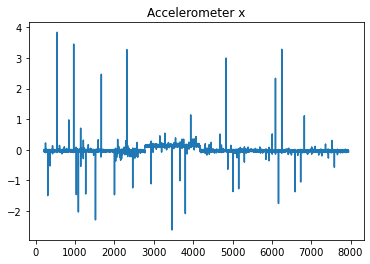

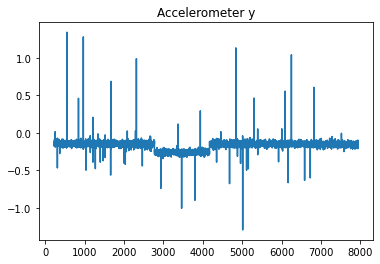

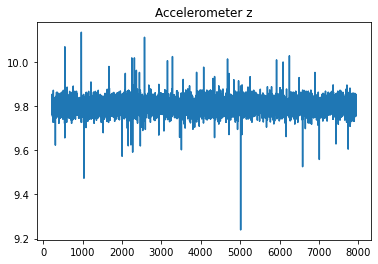

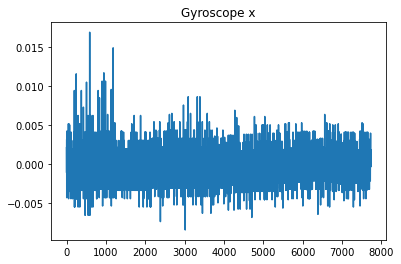

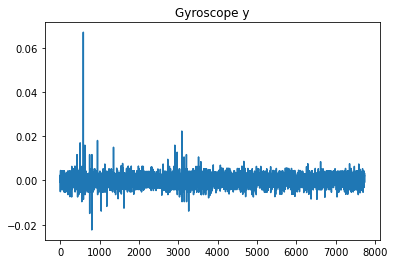

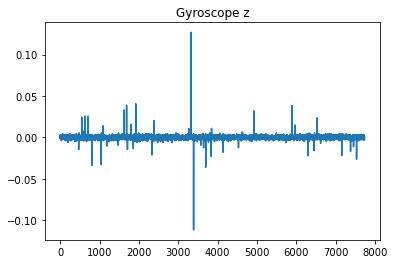

In [22]:
for df, name in zip([df_acc, df_gyro], ["Accelerometer", "Gyroscope"]):
    plt.plot(df["x"])
    plt.title(name + " x")
    plt.show()
    plt.plot(df["y"])
    plt.title(name + " y")
    plt.show()
    plt.plot(df["z"])
    plt.title(name + " z")
    plt.show()

In [23]:
current_payload = None
payload_change_indices = []
y_final_payload = []
print("Payload: ")
for index, reading in enumerate(df_acc.values):
    if reading[6] != current_payload:
        current_payload = reading[6]
        added_symbol = str(current_payload[-1]) if str(current_payload) != 'nan' else None
        
        if added_symbol is not None:
            payload_change_indices.append(index)
            y_final_payload.append(added_symbol)
            print(added_symbol, end='')

print("\n", "# of readings:", len(df_acc.values))
print(" # of payload changes:", len(payload_change_indices))
print(" Payload change indices:", payload_change_indices)

Payload: 
bcdefghijklmnopqrstuvwxyzAbcdefghijklmnopqrstuvwxyzAbcdefghijklmnopqrstuvwxyzAbcdefghijklmnopqrstuvwxyzAbcdefghijklmnopqrstuvwxyz
 # of readings: 7732
 # of payload changes: 129
 Payload change indices: [0, 39, 95, 157, 219, 280, 339, 397, 460, 519, 578, 634, 699, 758, 817, 876, 937, 1003, 1062, 1128, 1190, 1257, 1311, 1381, 1452, 1791, 1819, 1845, 1871, 1896, 1921, 1946, 1969, 1990, 2013, 2035, 2056, 2079, 2102, 2124, 2148, 2183, 2207, 2232, 2253, 2272, 2294, 2314, 2339, 2359, 2379, 2722, 2768, 2810, 2853, 2898, 2941, 2987, 3030, 3069, 3114, 3162, 3207, 3252, 3295, 3342, 3400, 3459, 3504, 3547, 3588, 3633, 3682, 3727, 3774, 3815, 3862, 4096, 4139, 4199, 4246, 4292, 4333, 4375, 4428, 4469, 4506, 4547, 4589, 4629, 4669, 4707, 4748, 4803, 4835, 4873, 4902, 4947, 4990, 5044, 5091, 5137, 5184, 5481, 5557, 5638, 5715, 5797, 5882, 5958, 6040, 6114, 6204, 6287, 6376, 6444, 6521, 6613, 6693, 6800, 6888, 6979, 7060, 7150, 7224, 7311, 7378, 7455, 7536]


In [24]:
important_indices = []
X_sequences = []
N_SURROUNDING = 10
for index in payload_change_indices:
    X_sequences.append(range(index - N_SURROUNDING , index + N_SURROUNDING))
    for i in range(index - N_SURROUNDING , index + N_SURROUNDING):
        if i >= 0 and i < len(df_acc.values) and i < len(df_gyro.values) and not (i in important_indices):
            important_indices.append(i)

print("# of relevant readings:", len(important_indices))
#print(important_indices)

# of relevant readings: 2569


In [25]:
X = np.array(
    [np.hstack((df_acc.iloc[seq,[3,4,5]].values, df_gyro.iloc[seq,[3,4,5]].values)) for seq in X_sequences]
)
print("Sequence Rows:", X.shape)
y = np.array(y_final_payload).reshape(-1,1)
print("Payload:", y_final_payload)

Sequence Rows: (129, 20, 6)
Payload: ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [26]:
# normalize the data?
# transformations?
print(X.shape)
# print(X)
print(y.shape)
# print(y)

(129, 20, 6)
(129, 1)


In [27]:
# output to /processed_data/
np.save(os.getcwd() + "/processed_data/proc_X.npy", X)
np.save(os.getcwd() + "/processed_data/proc_y.npy", y)